In [1]:
import razor.flow as rf
from razor import api

import logging
import time
import typing as typ
import pandas as pd
import os

from razor.api.core import BlockScope
from razor.api import blocks

from razor.project.blocks.socket1 import STDIn
from razor.project.blocks.socket1 import STDOut


/usr/local/lib/python3.7/dist-packages/snowflake/connector/options.py:78: UserWarning: You have an incompatible version of 'pyarrow' installed (3.0.0), please install a version that adheres to: 'pyarrow<0.18.0,>=0.17.0; extra == "pandas"'
  warn_incompatible_dep('pyarrow', _installed_pyarrow_version.version, _expected_pyarrow_version)


In [2]:
def project_space_path(path):
    ps = api.datasources('Project Space')
    return os.path.join(ps.abspath(), path)



In [3]:
# lib1 = razor.api.libraries('pyarrow')

In [4]:
# razor.api.libraries('pyarrow')

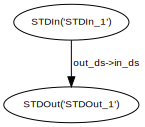

In [5]:
config = {'cores': 1, 'ram': 4096}


size = '10MB'
ip_filename = project_space_path("sdk_testbench/input_data/dummy_"+size+"_df.parquet")
op_filename = project_space_path("sdk_testbench/output_data/tc_01.parquet")

std_in = STDIn(filename=ip_filename)
# std_in.executor = rf.ContainerExecutor(cores=config['cores'], memory=config['ram'])
# std_in.out_ds = rf.Output.set(transport=rf.KafkaTransport)

std_out = STDOut(in_ds=std_in.out_ds, out_filename=op_filename)
# std_out.executor = rf.ContainerExecutor(cores=config['cores'], memory=config['ram'])

pipeline = rf.Pipeline(name='test_pipeline', targets=[std_out])
pipeline

In [6]:
pipeline.execute()

<Process(Pipeline Manager('test_pipeline'), stopped)>

In [12]:
pipeline.execute()

<Process(Pipeline Manager('test_pipeline'), stopped)>

In [7]:
import razor
razor.api.pipelines.save(pipeline)

RuntimeError: ('Failed to save pipeline! \n', 'Oops! Something went wrong. Please try again or contact support if the problem persists.')